# LLC4320 SST

In [1]:
from dask_gateway import GatewayCluster

cluster = GatewayCluster()
cluster.scale(30)
#cluster.adapt(minimum=2, maximum=10)  # or cluster.scale(n) to a fixed size.
client = cluster.get_client()

In [2]:
client

<Client: 'tls://10.36.64.118:8786' processes=1 threads=2, memory=8.00 GiB>

In [57]:
client.close()
cluster.close()

In [3]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import fsspec

In [4]:
from intake import open_catalog

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/llc4320.yaml")
ds  = cat["LLC4320_SST"].to_dask()

In [21]:
cat_grid = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/llc4320.yaml")
grid  = cat_grid["LLC4320_grid"].to_dask()

In [26]:
grid.XC

<xarray.DataArray 'XC' (face: 13, j: 4320, i: 4320)>
dask.array<xarray-XC, shape=(13, 4320, 4320), dtype=float32, chunksize=(1, 4320, 4320), chunktype=numpy.ndarray>
Coordinates: (12/18)
    CS       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    Depth    (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    PHrefC   float32 ...
    SN       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    XC       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    YC       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    ...       ...
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
    k        int64 ...
    k_l      int64 ...
    k_u      int64 ...
    rA       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
Attributes:
    coordinate:     YC XC
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east

In [5]:
ds

<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, j: 4320, time: 9030)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
Data variables:
    SST      (time, face, j, i) float32 dask.array<chunksize=(1, 1, 4320, 4320), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      Created by calling `open_mdsdataset(llc_method='smallchunks...
    source:       MITgcm
    title:        netCDF wrapper of MITgcm MDS binary data

In [6]:
sst = ds.SST.sel(time='2011-06-01', method='nearest').load()

In [7]:
sst.shape

(13, 4320, 4320)

In [8]:
sst[0,:,:]

<xarray.DataArray 'SST' (j: 4320, i: 4320)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 0.27788144,  0.30080017,  0.3186074 , ..., -1.5628352 ,
        -1.594186  , -1.558726  ],
       [ 0.22379693,  0.25919893,  0.28743258, ..., -1.566899  ,
        -1.6239544 , -1.6306869 ],
       [ 0.14672454,  0.19607492,  0.23751684, ..., -1.5858804 ,
        -1.6204052 , -1.6362863 ]], dtype=float32)
Coordinates:
    face     int64 0
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
    time     datetime64[ns] 2011-09-13

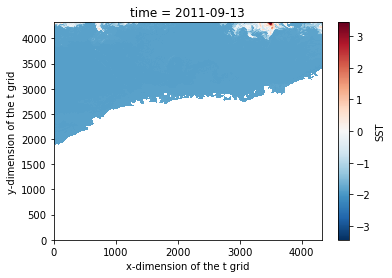

In [53]:
sst[0,:,:].plot()

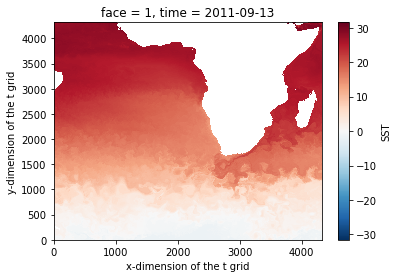

In [9]:
sst[1,:,:].plot();

In [10]:
sst[1:,:,:].nbytes/1e9

0.8957952

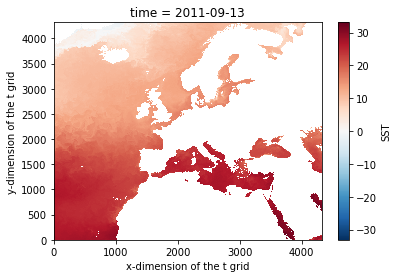

In [55]:
sst[2,:,:].plot();

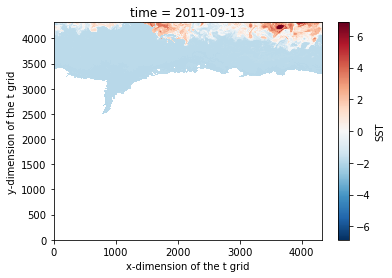

In [56]:
sst[3,:,:].plot();

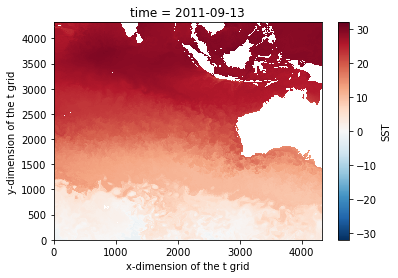

In [57]:
sst[4,:,:].plot();

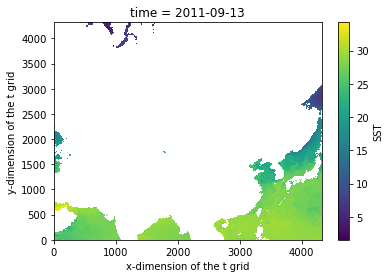

In [58]:
sst[5,:,:].plot();

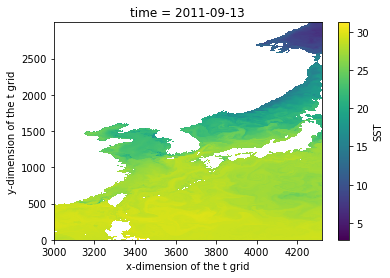

In [60]:
sst[5,:3000,3000:].plot();

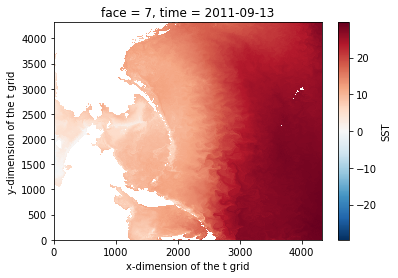

In [14]:
sst[7,:,:].plot();

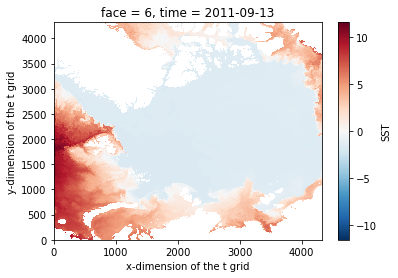

In [13]:
sst[6,:,:].plot();

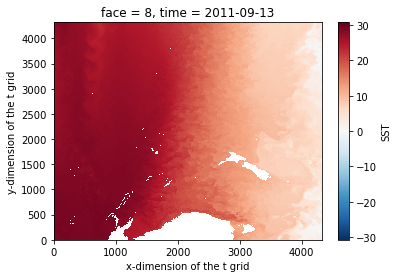

In [15]:
sst[8,:,:].plot();

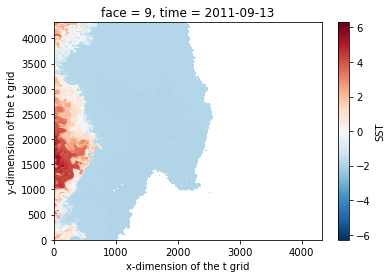

In [16]:
sst[9,:,:].plot();

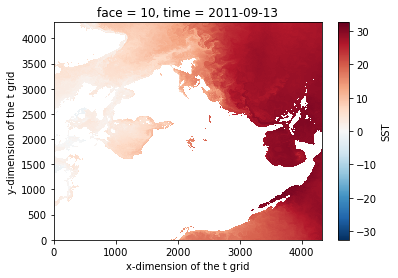

In [11]:
sst[10,:,:].plot();

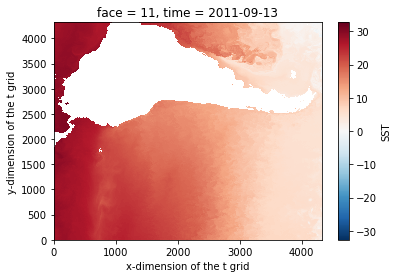

In [12]:
sst[11,:,:].plot();

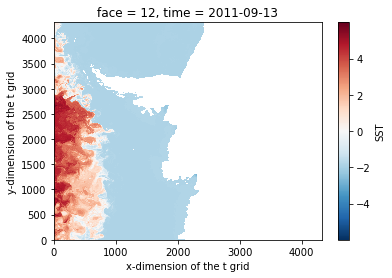

In [13]:
sst[12,:,:].plot();

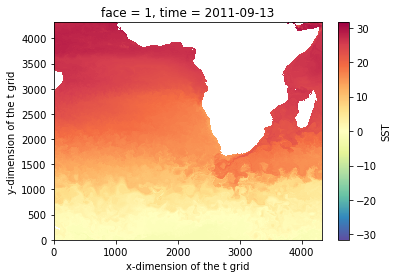

In [20]:
sst[1,:,:].plot(cmap='Spectral_r');

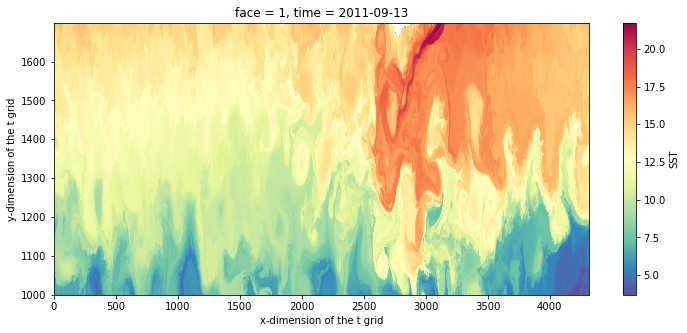

In [22]:
plt.figure(figsize=(12,5))
sst[1,1000:1700,:].plot(cmap='Spectral_r');

In [10]:
sst[1].i

<xarray.DataArray 'i' (i: 4320)>
array([   0,    1,    2, ..., 4317, 4318, 4319])
Coordinates:
    face     int64 1
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
    time     datetime64[ns] 2011-09-13
Attributes:
    axis:           X
    long_name:      x-dimension of the t grid
    standard_name:  x_grid_index
    swap_dim:       XC

In [15]:
agulhas = sst[1,1000:1700,:].load()
x_a = sst[1].i.load()
y_a = sst[1].j[1000:1700].load()

In [16]:
kuroshio = sst[5,:3000,3000:].load()
x = sst[5].i[3000:].load()
y = sst[5].j[:3000].load()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
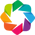

In [27]:
import xmitgcm.llcreader as llcreader
%matplotlib inline
import holoviews as hv
from holoviews.operation.datashader import regrid
hv.extension('bokeh')

In [29]:
model = llcreader.LLC4320Model('https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/llc4320.yaml')
model

AttributeError: 'str' object has no attribute 'shrunk'

In [30]:
kuroshio

<xarray.DataArray 'SST' (j: 3000, i: 1320)>
array([[28.421251 , 28.416    , 28.374027 , ..., 28.995493 , 28.99292  ,
        28.996717 ],
       [28.414284 , 28.408504 , 28.368742 , ..., 29.001108 , 28.997057 ,
        28.999966 ],
       [28.407286 , 28.395521 , 28.361303 , ..., 29.008865 , 29.002234 ,
        29.004412 ],
       ...,
       [       nan,        nan,        nan, ...,  7.9196258,  7.9059176,
         7.8878183],
       [       nan,        nan,        nan, ...,  7.9198246,  7.9002757,
         7.882659 ],
       [       nan,        nan,        nan, ...,  7.925909 ,  7.9095225,
         7.8973703]], dtype=float32)
Coordinates:
    face     int64 5
  * i        (i) int64 3000 3001 3002 3003 3004 ... 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 2993 2994 2995 2996 2997 2998 2999
    time     datetime64[ns] 2011-09-13

In [31]:
dataset = hv.Dataset(kuroshio.astype('f4'))
hv_im = (dataset.to(hv.Image, ['i', 'j'], dynamic=True)
                .options(cmap='Magma', width=950, height=600, colorbar=True))

%output holomap='scrubber' fps=3
regrid(hv_im, precompute=True)

:DynamicMap   []
   :Image   [i,j]   (SST)

In [56]:
agulhas

<xarray.DataArray 'SST' (j: 700, i: 4320)>
array([[ 6.7116265,  6.9994206,  7.328214 , ...,  4.358901 ,  4.352814 ,
         4.3712926],
       [ 6.699001 ,  6.977382 ,  7.3062506, ...,  4.441701 ,  4.432398 ,
         4.4210935],
       [ 6.688671 ,  6.957292 ,  7.284752 , ...,  4.4513373,  4.43836  ,
         4.426742 ],
       ...,
       [15.111896 , 15.0984535, 15.09699  , ..., 15.40528  , 15.398175 ,
        15.380607 ],
       [15.10076  , 15.089888 , 15.090838 , ..., 15.404093 , 15.388659 ,
        15.386623 ],
       [15.088147 , 15.082157 , 15.085087 , ..., 15.430686 , 15.389105 ,
        15.388938 ]], dtype=float32)
Coordinates:
    face     int64 1
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 1000 1001 1002 1003 1004 ... 1695 1696 1697 1698 1699
    time     datetime64[ns] 2011-09-13

In [55]:
dataset = hv.Dataset(agulhas.astype('f4'))
hv_im = (dataset.to(hv.Image, ['i', 'j'], dynamic=True)
                .options(cmap='inferno', width=1000, height=600, colorbar=True, 
                         xaxis='bare', yaxis='bare', 
                         title='SST of Agulhas Current Region'))
%output holomap='scrubber' fps=3
regrid(hv_im, precompute=True)

:DynamicMap   []
   :Image   [i,j]   (SST)

In [17]:
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

<ipython-input-14-a5e49b33f0f5>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, kuroshio)


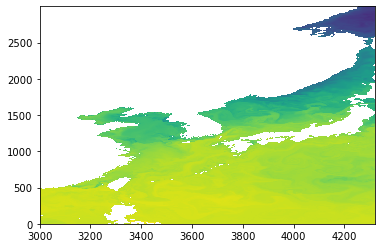

In [14]:
plt.pcolormesh(x, y, kuroshio)

In [20]:
x

<xarray.DataArray 'i' (i: 1320)>
array([3000, 3001, 3002, ..., 4317, 4318, 4319])
Coordinates:
    face     int64 5
  * i        (i) int64 3000 3001 3002 3003 3004 ... 4315 4316 4317 4318 4319
    time     datetime64[ns] 2011-09-13
Attributes:
    axis:           X
    long_name:      x-dimension of the t grid
    standard_name:  x_grid_index
    swap_dim:       XC

In [19]:
kuroshio.i

<xarray.DataArray 'i' (i: 1320)>
array([3000, 3001, 3002, ..., 4317, 4318, 4319])
Coordinates:
    face     int64 5
  * i        (i) int64 3000 3001 3002 3003 3004 ... 4315 4316 4317 4318 4319
    time     datetime64[ns] 2011-09-13
Attributes:
    axis:           X
    long_name:      x-dimension of the t grid
    standard_name:  x_grid_index
    swap_dim:       XC

<ipython-input-15-ebbd05915780>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_a, y_a, agulhas, cmap='Spectral_r')


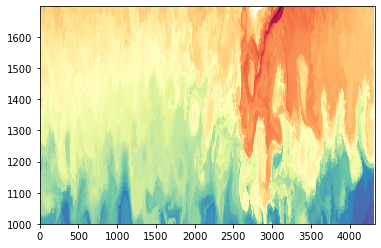

In [15]:
plt.pcolormesh(x_a, y_a, agulhas, cmap='Spectral_r')

KeyboardInterrupt: 

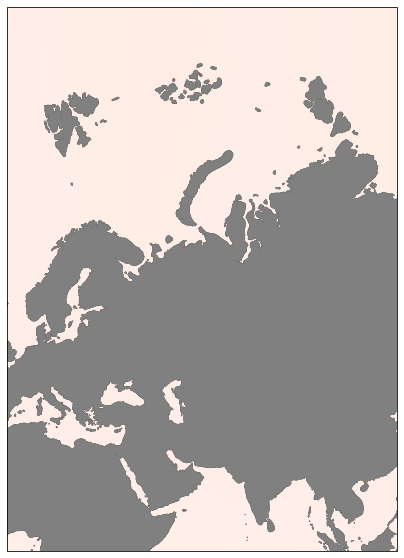

In [16]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=proj))

ax.set_extent([3000, 4319, 0, 3000], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))

im = ax.pcolormesh(x, y, kuroshio, transform=ccrs.PlateCarree(), cmap='Reds_r', vmax=30)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("Sea Surface Temperature [˚C]", labelpad=12, fontsize=13)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

ax.text(-0.1, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)

plt.title('SST of Gulf Stream from MUR satellite data', fontsize=12);

In [20]:
ds.SST

<xarray.DataArray 'SST' (time: 9030, face: 13, j: 4320, i: 4320)>
dask.array<xarray-SST, shape=(9030, 13, 4320, 4320), dtype=float32, chunksize=(1, 1, 4320, 4320), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00

In [19]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=proj))

ax.set_extent([sst[1].i[0], sst[1].i[-1], sst[1].j[0], sst[1].j[-1]], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))

im = ax.pcolormesh(x_a, y_a, agulhas, transform=ccrs.PlateCarree(), cmap='Spectral_r')
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("Sea Surface Temperature [˚C]", labelpad=12, fontsize=13)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

ax.text(-0.1, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)

plt.title('SST of Aghulas Rings and Retroflection from LLC4320 model data', fontsize=12);

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f906c09b940> (for post_execute):


KeyboardInterrupt: 